## ¿Qué es el Análisis Exploratorio de los Datos?


El AED consiste en aplicar un conjunto de técnicas estadísticas dirigidas a explorar, describir y resumir la naturaleza de los datos, de tal forma que podamos garantizar su objetividad e interoperabilidad. Gracias a ello se pueden identificar posibles errores, revelar la presencia de valores atípicos, comprobar la relación entre variables (correlaciones) y su posible redundancia, así como realizar un análisis descriptivo de los datos mediante representaciones gráficas y resúmenes de los aspectos más significativos. En muchas ocasiones, esta exploración de los datos se descuida y no se lleva a cabo de manera correcta.

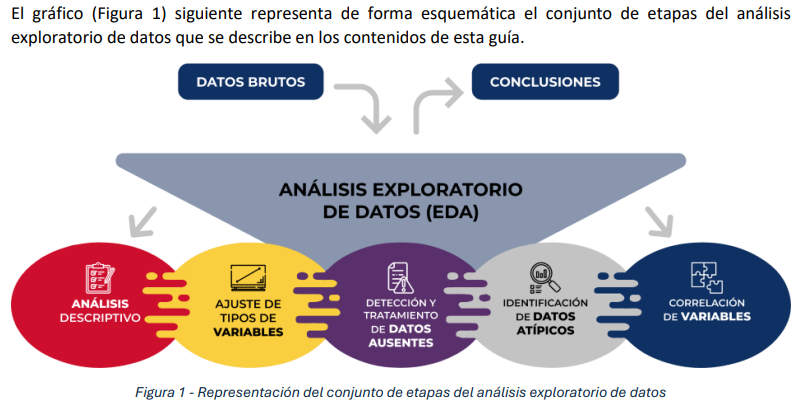

Antes de comenzar, se mostraran los datos en la cual se basara esta guia

In [73]:
# Cargar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Cargar los datos en un DataFrame
calidad_aire = pd.read_csv('https://datosabiertos.jcyl.es/web/jcyl/risp/es/medio-ambiente/calidad_aire_historico/1284212629698.csv', sep = ';')



In [62]:
calidad_aire

,Fecha,NO (ug/m3),NO2 (ug/m3),O3 (ug/m3),PM10 (ug/m3),SO2 (ug/m3),Provincia,Estación,Latitud,Longitud,Posición
0,2020-12-31,8.0,16.0,52.619754,6.000000,1.0,Burgos,Burgos1,42.351111,-3.675556,"42.3511111111,-3.67555555556"
1,2020-12-31,2.0,6.0,52.619754,8.000000,4.0,León,C.T.L.R. - Naredo,42.816667,-5.533333,"42.8166666667,-5.53333333333"
2,2020-12-31,8.0,2.0,65.000000,4.000000,2.0,León,Carracedelo,42.558611,-6.725556,"42.5586111111,-6.72555555556"
3,2020-12-31,1.0,4.0,58.000000,21.000000,17.0,León,La Robla,42.801667,-5.625000,"42.8016666667,-5.625"
4,2020-12-31,1.0,1.0,52.619754,6.000000,2.0,León,Tudela Veguin-Tudela Veguin,42.801667,-5.648889,"42.8016666667,-5.64888888889"
...,...,...,...,...,...,...,...,...,...,...,...
446009,1997-01-01,31.0,44.0,9.000000,36.000000,37.0,León,Leon2,42.588611,-5.571389,"42.5886111111,-5.57138888889"
446010,1997-01-01,9.0,18.0,32.000000,35.000000,40.0,Palencia,Guardo,42.795278,-4.840833,"42.7952777778,-4.84083333333"
446011,1997-01-01,13.0,31.0,32.000000,45.000000,8.0,Burgos,Aranda de Duero,41.671111,-3.683889,"41.6711111111,-3.68388888889"
446012,1997-01-01,17.0,54.0,86.000000,32.000000,13.0,Segovia,Segovia,40.949722,-4.115833,"40.9497222222,-4.11583333333"


## CARGA DE DATOS Y VISTAZO GENERAL

In [63]:
# Mostrar la estructura del DataFrame
print(calidad_aire.info())
print("="*100) # -> Linea de separamiento
# Mostrar un resumen estadístico de las variables numéricas
print(calidad_aire.describe())
print("="*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446014 entries, 0 to 446013
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Fecha         446014 non-null  datetime64[ns]
 1   NO (ug/m3)    446014 non-null  float64       
 2   NO2 (ug/m3)   446014 non-null  float64       
 3   O3 (ug/m3)    446014 non-null  float64       
 4   PM10 (ug/m3)  446014 non-null  float64       
 5   SO2 (ug/m3)   446014 non-null  float64       
 6   Provincia     446014 non-null  category      
 7   Estación      446014 non-null  category      
 8   Latitud       446014 non-null  float64       
 9   Longitud      446014 non-null  float64       
 10  Posición      445788 non-null  object        
dtypes: category(2), datetime64[ns](1), float64(7), object(1)
memory usage: 31.5+ MB
None
          NO (ug/m3)    NO2 (ug/m3)     O3 (ug/m3)   PM10 (ug/m3)  \
count  446014.000000  446014.000000  446014.000000  446014.000000  

## DISTRIBUCIÓN DE LAS VARIABLES NUMÉRICAS

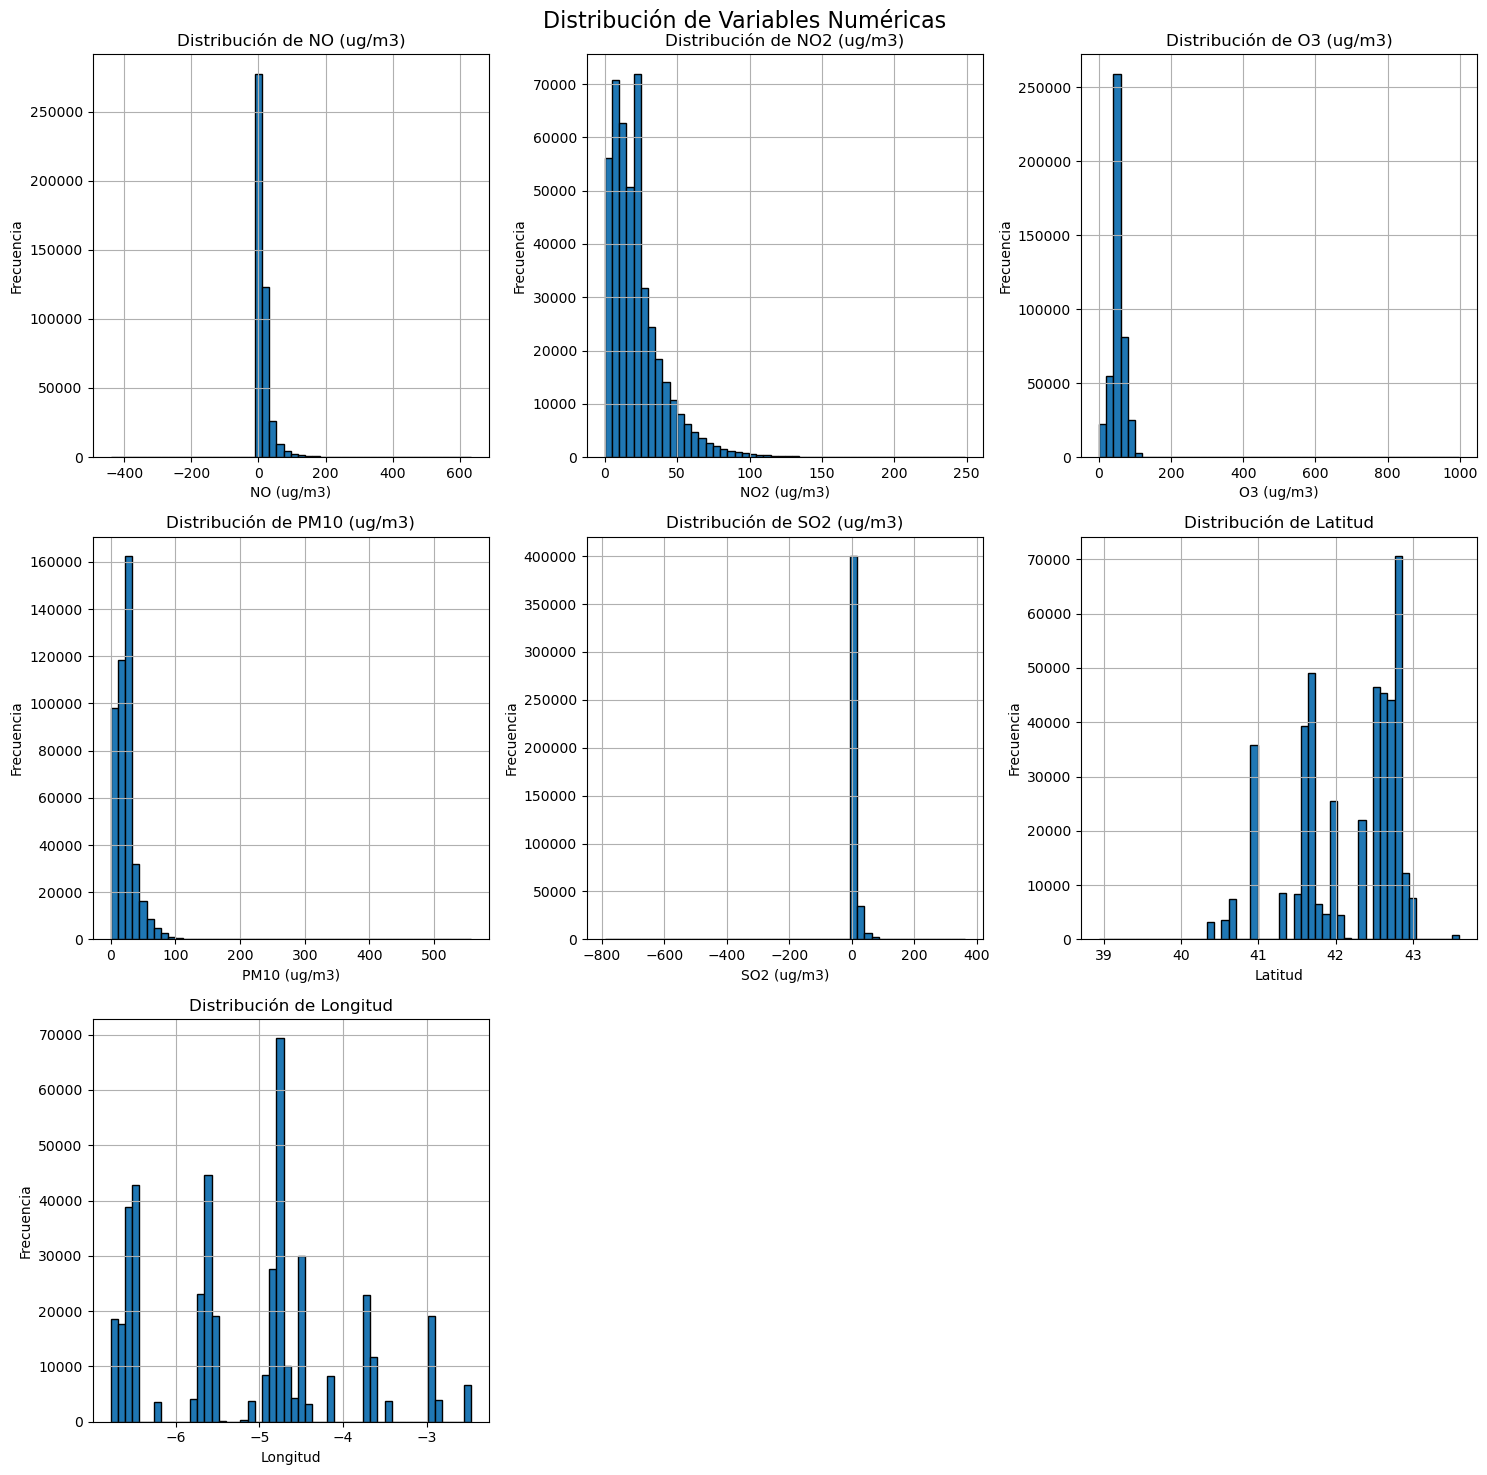

In [72]:
# Seleccionar solo las columnas numéricas
columnas_numericas = calidad_aire.select_dtypes(include=[np.number]).columns

# Calcular el número de filas y columnas para el subplot
n = len(columnas_numericas)
nrows = 3
ncols = min(n, 3)

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16)

# Aplanar el array de ejes en caso de que sea 2D
axes = axes.flatten() if n > 3 else [axes]

# Crear histogramas para cada variable numérica
for i, col in enumerate(columnas_numericas):
    ax = axes[i]
    calidad_aire[col].hist(ax=ax, bins=50, edgecolor='black')
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Ocultar subplots vacíos si los hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## AJUSTE DE LAS VARIABLES CATEGÓRICAS

In [75]:
# Ajustar el tipo de la variable Fecha
calidad_aire['Fecha'] = pd.to_datetime(calidad_aire['Fecha'], errors='coerce')


In [76]:
calidad_aire

,Fecha,CO (mg/m3),NO (ug/m3),NO2 (ug/m3),O3 (ug/m3),PM10 (ug/m3),PM25 (ug/m3),SO2 (ug/m3),Provincia,Estación,Latitud,Longitud,Posición
0,2020-12-31,0.6,8.0,16.0,NaN,6.0,NaN,1.0,Burgos,Burgos1,42.351111,-3.675556,"42.3511111111,-3.67555555556"
1,2020-12-31,NaN,2.0,6.0,NaN,8.0,NaN,4.0,León,C.T.L.R. - Naredo,42.816667,-5.533333,"42.8166666667,-5.53333333333"
2,2020-12-31,NaN,8.0,2.0,65.0,4.0,NaN,2.0,León,Carracedelo,42.558611,-6.725556,"42.5586111111,-6.72555555556"
3,2020-12-31,NaN,1.0,4.0,58.0,21.0,NaN,17.0,León,La Robla,42.801667,-5.625000,"42.8016666667,-5.625"
4,2020-12-31,NaN,1.0,1.0,NaN,6.0,NaN,2.0,León,Tudela Veguin-Tudela Veguin,42.801667,-5.648889,"42.8016666667,-5.64888888889"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446009,1997-01-01,NaN,31.0,44.0,9.0,36.0,NaN,37.0,León,Leon2,42.588611,-5.571389,"42.5886111111,-5.57138888889"
446010,1997-01-01,NaN,9.0,18.0,32.0,35.0,NaN,40.0,Palencia,Guardo,42.795278,-4.840833,"42.7952777778,-4.84083333333"
446011,1997-01-01,1.5,13.0,31.0,32.0,45.0,NaN,8.0,Burgos,Aranda de Duero,41.671111,-3.683889,"41.6711111111,-3.68388888889"
446012,1997-01-01,2.0,17.0,54.0,86.0,32.0,NaN,13.0,Segovia,Segovia,40.949722,-4.115833,"40.9497222222,-4.11583333333"


In [78]:
# Ajustar el tipo de la variable Provincia
print(calidad_aire['Provincia'].unique())
calidad_aire['Provincia'] = calidad_aire['Provincia'].astype('category')
print('='*100)
# Ajustar el tipo de la variable Estación
print(calidad_aire['Estación'].unique())
calidad_aire['Estación'] = calidad_aire['Estación'].astype('category')

['Burgos', 'León', 'Palencia', 'Salamanca', 'Valladolid', 'Soria', 'Zamora', 'Avila', 'Segovia', 'Madrid']
Categories (10, object): ['Avila', 'Burgos', 'León', 'Madrid', ..., 'Segovia', 'Soria', 'Valladolid', 'Zamora']
['Burgos1', 'C.T.L.R. - Naredo', 'Carracedelo', 'La Robla', 'Tudela Veguin-Tudela Veguin', ..., 'Ponferrada2', 'Miranda de Ebro3', 'Palencia1', 'Salamanca1', 'Arco Ladrillo I']
Length: 91
Categories (91, object): ['Aranda de Duero', 'Aranda de Duero 2', 'Arco Ladrillo I', 'Arco de ladrillo II', ..., 'Velilla del Rio Carrion', 'Venta de Baños', 'Zamora', 'Zamora 2']


## ANÁLISIS DE DATOS AUSENTES

In [79]:
# Devuelve un DataFrame booleano
calidad_aire.isna()

,Fecha,CO (mg/m3),NO (ug/m3),NO2 (ug/m3),O3 (ug/m3),PM10 (ug/m3),PM25 (ug/m3),SO2 (ug/m3),Provincia,Estación,Latitud,Longitud,Posición
0,False,False,False,False,True,False,True,False,False,False,False,False,False
1,False,True,False,False,True,False,True,False,False,False,False,False,False
2,False,True,False,False,False,False,True,False,False,False,False,False,False
3,False,True,False,False,False,False,True,False,False,False,False,False,False
4,False,True,False,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
446009,False,True,False,False,False,False,True,False,False,False,False,False,False
446010,False,True,False,False,False,False,True,False,False,False,False,False,False
446011,False,False,False,False,False,False,True,False,False,False,False,False,False
446012,False,False,False,False,False,False,True,False,False,False,False,False,False


In [80]:
# Devuelve True si hay al menos un valor ausente
calidad_aire.isna().any().any()


True

In [83]:
# Devuelve el número total de NaN que presenta el DataFrame
print(calidad_aire.isna().sum().sum())
# Devuelve el % de valores perdidos
print(calidad_aire.isna().mean().mean())

# Detección del número de valores perdidos en cada una de las columnas
calidad_aire.isna().sum()

# Detección del % de valores perdidos en cada una de las columnas
calidad_aire.isna().mean().round(2)

1163037
0.20058649418041727


Fecha           0.00
CO (mg/m3)      0.77
NO (ug/m3)      0.07
NO2 (ug/m3)     0.07
O3 (ug/m3)      0.38
PM10 (ug/m3)    0.23
PM25 (ug/m3)    0.88
SO2 (ug/m3)     0.20
Provincia       0.00
Estación        0.00
Latitud         0.00
Longitud        0.00
Posición        0.00
dtype: float64

## DETECCIÓN DE ATÍPICOS SOBRE VARIABLES NUMÉRICAS (HISTOGRAMA Y GRAFICO DE CAJAS Y BIGOTES)

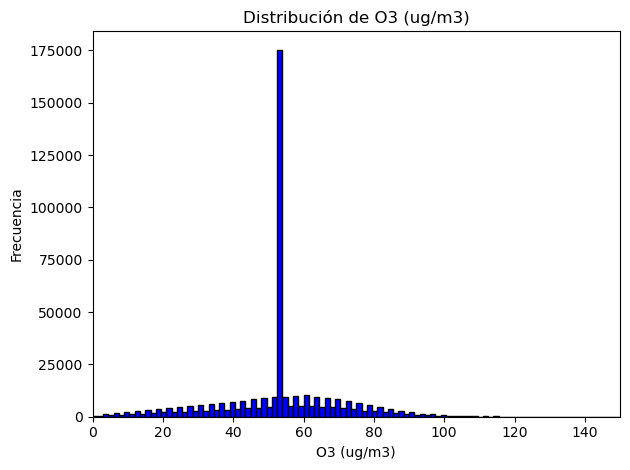

Estadísticas para O3:
Q1 - 1.5IQR = 31.50
Q1 = 48.00
Mediana = 52.62
Q3 = 59.00
Q3 + 1.5IQR = 75.50
Número de observaciones: 446014
Número de outliers: 91163


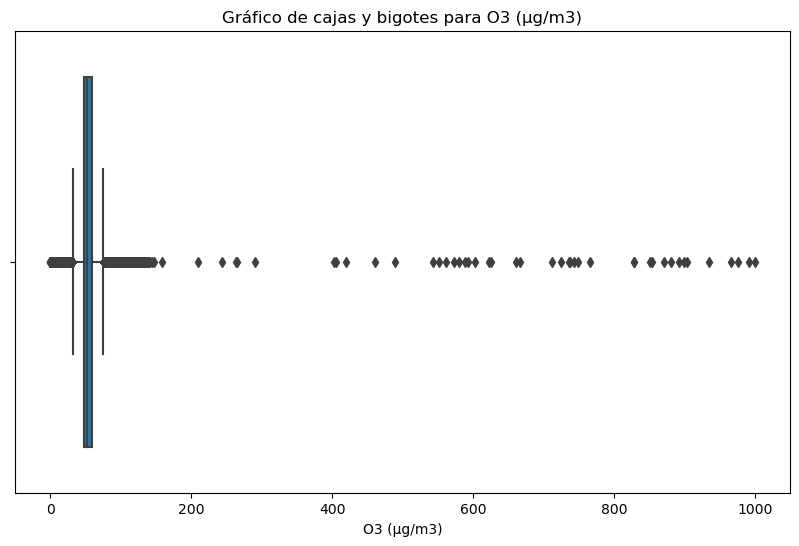

In [58]:
plt.hist(calidad_aire['O3 (ug/m3)'], bins=100, range=(0, 150), color='blue', edgecolor='black')
plt.title('Distribución de O3 (ug/m3)')
plt.xlabel('O3 (ug/m3)')
plt.ylabel('Frecuencia')
plt.xlim(0,150)
plt.tight_layout()
plt.show()


import seaborn as sns
# Estadísticas necesarias para reproducir el gráfico de cajas y bigotes
Q1 = calidad_aire['O3 (ug/m3)'].quantile(0.25)
Q3 = calidad_aire['O3 (ug/m3)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Estadísticas para O3:")
print(f"Q1 - 1.5IQR = {lower_bound:.2f}")
print(f"Q1 = {Q1:.2f}")
print(f"Mediana = {calidad_aire['O3 (ug/m3)'].median():.2f}")
print(f"Q3 = {Q3:.2f}")
print(f"Q3 + 1.5IQR = {upper_bound:.2f}")
print(f"Número de observaciones: {len(calidad_aire['O3 (ug/m3)'])}")
print(f"Número de outliers: {sum((calidad_aire['O3 (ug/m3)'] < lower_bound) | (calidad_aire['O3 (ug/m3)'] > upper_bound))}")

# Construcción del gráfico de cajas y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(x=calidad_aire['O3 (ug/m3)'])
plt.title('Gráfico de cajas y bigotes para O3 (µg/m3)')
plt.xlabel('O3 (µg/m3)')
plt.show()

## ANÁLISIS DE CORRELACIÓN ENTRE VARIABLES

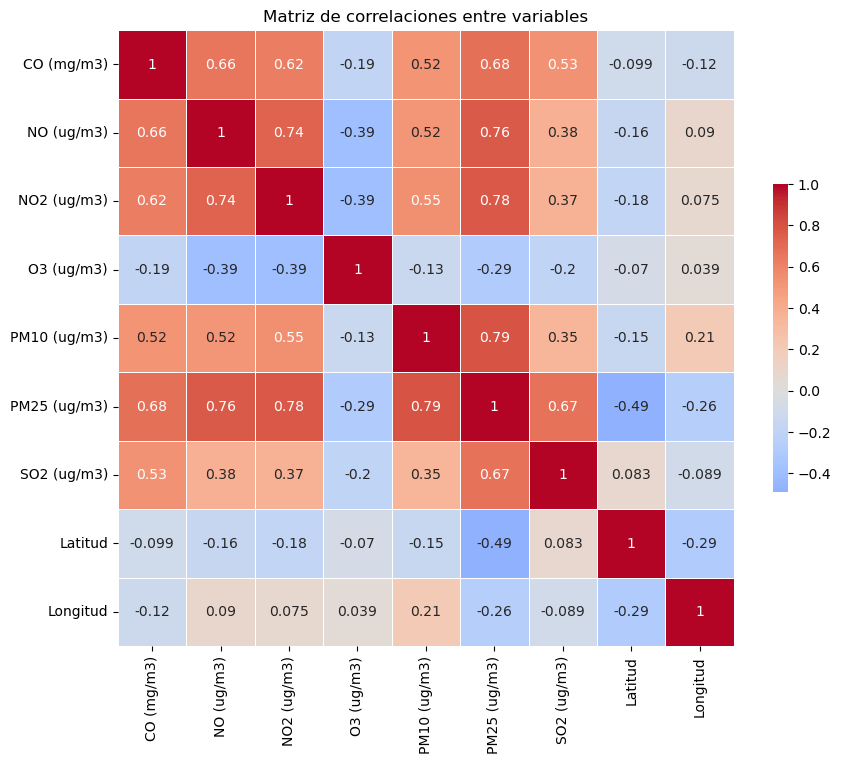

In [84]:
num_variables = calidad_aire.select_dtypes(include=[np.number])

# Calculamos la matriz de coeficientes de correlación entre las variables numéricas
correlacion = num_variables.corr()

# Configuración del gráfico de correlación
plt.figure(figsize=(10, 8))

# Gráfico de correlaciones utilizando un mapa de calor
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matriz de correlaciones entre variables')
plt.show()